<a href="https://colab.research.google.com/github/AcchyAntZTnr/MaximoLluviasFEN/blob/main/codigo/ANALISIS_LLUVIAS_PIURA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importante: De usar el entorno google colab, se debe crear una carpeta llamada "PERU EXP CON DATOS" y guardar el archivo separado por comas (csv) dentro de esa carpeta y tomar la ruta de ese archivo para usarlo en el metodo pd.read_csv

In [14]:
#Importante: De usar el entorno google colab y google drive, se debe crear una carpeta llamada
#  "PERU EXP CON DATOS" y guardar el archivo separado por comas (csv) dentro de esa carpeta
#   y tomar la ruta de ese archivo para usarlo en el metodo pd.read_csv
#De ejecutar el código de manera local, copiar la ruta del archivo y pegarla
#  dentro de las comilas en el metodo pd.read_csv

globalTable = pd.read_csv("/content/drive/MyDrive/PERU EXP CON DATOS/DATOS HIDROM ESTACION MIRAFLORES PIURA.csv",encoding="latin-1")
nombreEstacionMeteorologica = "MIRAFLORES - PIURA - PIURA" #COLOCAR EL NOMBRE DE LA ESTACIÓN DE DONDE SE TOMARON LOS DATOS
rainPiuraTable = globalTable.iloc[:,[0,1,2,3]]

#SE OBTIENE EL PERIODO DE TIEMPO, ASEGURAR QUE DICHA COLUMNA NO CONTENGA VALORES NAN ANTES DE LEER EL ARCHIVO CSV
periodoReg = [globalTable["Año"].min(), globalTable["Año"].max()]
#CÓDIGO PARA CAMBIAR LOS VALORES DE -99.9 A NAN
rainPiuraTable = rainPiuraTable.replace({-99.9 : float("NaN")})
#SE USA INTERPOLACIÓN LINEAL PARA RELLENAR ALGUNOS DATOS FALTANTES
rainPiuraTableCopy = rainPiuraTable
rainPiuraTableCopy = rainPiuraTableCopy.interpolate(method = "linear", limit = 3, limit_direction ="forward", axis = 0)
globalTable ##SI SE VA A USAR UN ENTORNO DIFERENTE A GOOGLE COLAB, USAR PRINT PARA IMPRIMIR EL DATAFRAME

,Año,Mes,Dia,Precipitación acumulada (mm),Temperatura máxima,Temperatura mínima.,Unnamed: 6
0,1971,4,2,0.0,-99.9,-99.9,NaN
1,1971,4,3,0.0,30.5,21.5,NaN
2,1971,4,4,0.0,31.2,21.2,NaN
3,1971,4,5,1.4,33.8,21.0,NaN
4,1971,4,6,0.0,34.4,21.0,NaN
...,...,...,...,...,...,...,...
15610,2013,12,27,0.0,31.8,20.0,NaN
15611,2013,12,28,0.0,30.8,21.4,NaN
15612,2013,12,29,0.0,30.4,21.2,NaN
15613,2013,12,30,0.0,33.2,21.0,NaN


In [15]:
#SE CREAN LAS LISTAS PARA ENSAMBLAR LA TABLA DEL EJE X DEL PRIMER GRAFICO
#GRAFICO INTERACTIVO, Y SE CREA EL DATAFRAME "dfLluviasPorMes" DONDE SE GUARDAN
#LOS DATOS A GRAFICAR.
meses = ["ene", "feb", "mar", "abr", "may", "jun", "jul", "ago", "sept", "oct", "nov", "dic"]

lluviasPorMes = []
listaTabla = [["Precipitación promedio (mm)", "PAM (mm/dia)", "SAM (mm/dia)", "TAM (mm/dia)"]]
for i in range(1,13):
  lluvias = rainPiuraTableCopy.loc[rainPiuraTableCopy["Mes"] == i].dropna()
  lluvias = lluvias.sort_values(by = "Precipitación acumulada (mm)", ascending = False)
  descripcion = ["llovió {:.1f} mm<br>el {:02d}/{:02d}/{}".format(lluvias.iloc[0,3], lluvias.iloc[0,2], lluvias.iloc[0,1], lluvias.iloc[0,0]),
                 "llovió {:.1f} mm<br>el {:02d}/{:02d}/{}".format(lluvias.iloc[1,3], lluvias.iloc[1,2], lluvias.iloc[1,1], lluvias.iloc[1,0]),
                 "llovió {:.1f} mm<br>el {:02d}/{:02d}/{}".format(lluvias.iloc[2,3], lluvias.iloc[2,2], lluvias.iloc[2,1], lluvias.iloc[2,0])]
  lluviasPorMes.append({  "N° MES": lluvias.iloc[0,1],
                          "MES" : meses[i-1],
                          "PRECIPITACION PROMEDIO (mm)" : round(lluvias["Precipitación acumulada (mm)"].mean(), 2),
                          "1era PRECIP MÁXIMA REG (mm)" : lluvias.iloc[0,3],
                          "2da PRECIP MÁXIMA REG (mm)" : lluvias.iloc[1,3],
                          "3era PRECIP MÁXIMA REG (mm)" : lluvias.iloc[2,3],
                          "descr 1era PRECIP" : descripcion[0],
                          "descr 2da PRECIP" : descripcion[1],
                          "descr 3era PRECIP" : descripcion[2]})
dfLluviasPorMes = pd.DataFrame(lluviasPorMes)
for j in range(2,6):
  listaTabla.append([dfLluviasPorMes.iloc[k,j] for k in range(0,12)])
dfLluviasPorMes #SI SE VA A USAR UN ENTORNO DIFERENTE A GOOGLE COLAB, USAR PRINT PARA IMPRIMIR EL DATAFRAME

,N° MES,MES,PRECIPITACION PROMEDIO (mm),1era PRECIP MÁXIMA REG (mm),2da PRECIP MÁXIMA REG (mm),3era PRECIP MÁXIMA REG (mm),descr 1era PRECIP,descr 2da PRECIP,descr 3era PRECIP
0,1,ene,1.04,173.6,75.8,75.5,llovió 173.6 mm<br>el 24/01/1998,llovió 75.8 mm<br>el 12/01/1998,llovió 75.5 mm<br>el 22/01/1998
1,2,feb,1.19,104.5,90.0,86.9,llovió 104.5 mm<br>el 13/02/1983,llovió 90.0 mm<br>el 07/02/1998,llovió 86.9 mm<br>el 13/02/1998
2,3,mar,1.71,112.0,98.0,86.8,llovió 112.0 mm<br>el 02/03/1998,llovió 98.0 mm<br>el 14/03/1983,llovió 86.8 mm<br>el 22/03/1983
3,4,abr,1.18,151.4,107.1,94.5,llovió 151.4 mm<br>el 16/04/1983,llovió 107.1 mm<br>el 12/04/1992,llovió 94.5 mm<br>el 26/04/1983
4,5,may,0.36,91.8,64.7,58.9,llovió 91.8 mm<br>el 14/05/1983,llovió 64.7 mm<br>el 17/05/1983,llovió 58.9 mm<br>el 24/05/1983
5,6,jun,0.17,130.4,40.9,6.6,llovió 130.4 mm<br>el 07/06/1983,llovió 40.9 mm<br>el 04/06/1983,llovió 6.6 mm<br>el 09/06/1983
6,7,jul,0.01,3.6,0.9,0.9,llovió 3.6 mm<br>el 16/07/2011,llovió 0.9 mm<br>el 08/07/1984,llovió 0.9 mm<br>el 08/07/2008
7,8,ago,0.00,1.1,0.6,0.5,llovió 1.1 mm<br>el 26/08/1975,llovió 0.6 mm<br>el 30/08/1981,llovió 0.5 mm<br>el 31/08/1983
8,9,sept,0.01,2.6,0.7,0.5,llovió 2.6 mm<br>el 24/09/1977,llovió 0.7 mm<br>el 13/09/1995,llovió 0.5 mm<br>el 10/09/2003
9,10,oct,0.02,5.1,2.5,2.2,llovió 5.1 mm<br>el 02/10/1987,llovió 2.5 mm<br>el 10/10/2005,llovió 2.2 mm<br>el 24/10/1981


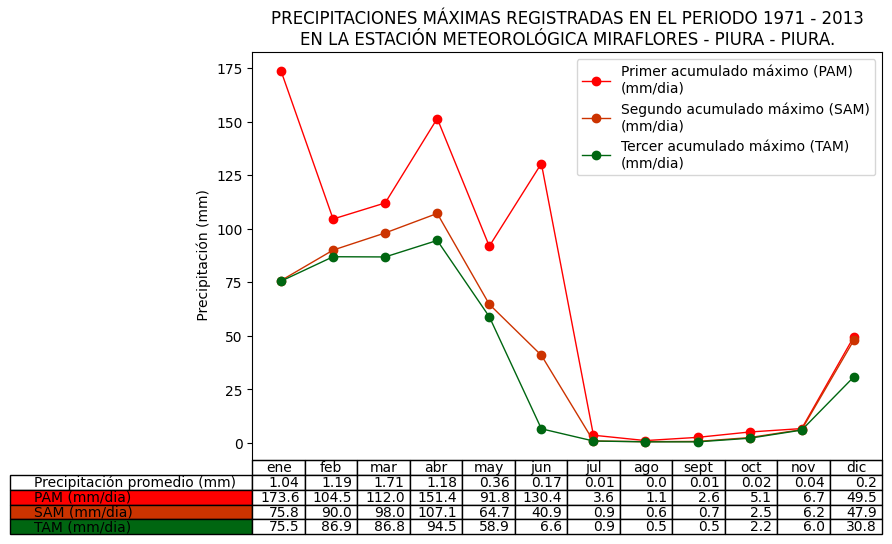

In [18]:
#CODIGO PARA ELABORAR Y MOSTRAR EL GRÁFICO CON TABLA USANDO matplotlib (plt)
#Y ELABORAR Y MOSTRAR EL GRÁFICO INTERACTIVO USANDO plotly.graph_objs (go) y iplot

colores = ["#FFFFFF","#FF0000","#CC3300","#006611"]
plt.figure(figsize = (9,6))
plt.plot(dfLluviasPorMes["N° MES"],dfLluviasPorMes["1era PRECIP MÁXIMA REG (mm)"], color = "#FF0000", linewidth = 1, marker = "o", label = "Primer acumulado máximo (PAM)\n(mm/dia)")

plt.plot(dfLluviasPorMes["N° MES"],dfLluviasPorMes["2da PRECIP MÁXIMA REG (mm)"], color = "#CC3300", linewidth = 1, marker = "o", label = "Segundo acumulado máximo (SAM)\n(mm/dia)")

plt.plot(dfLluviasPorMes["N° MES"],dfLluviasPorMes["3era PRECIP MÁXIMA REG (mm)"],color = "#006611", linewidth = 1, marker = "o", label = "Tercer acumulado máximo (TAM)\n(mm/dia)")

plt.title("PRECIPITACIONES MÁXIMAS REGISTRADAS EN EL PERIODO {} - {}\nEN LA ESTACIÓN METEOROLÓGICA {}.".format(periodoReg[0], periodoReg[1], nombreEstacionMeteorologica))
plt.ylabel(" Precipitación (mm)")
plt.xticks([])
plt.legend( loc = "best")
plt.table(cellText = listaTabla[1:], rowLabels = listaTabla[0],colLabels = meses, loc = "bottom", rowColours = colores)
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.show()
print("\n")

figInterac = go.Figure()
figInterac.add_trace(go.Scatter(x = dfLluviasPorMes["MES"], y = dfLluviasPorMes["1era PRECIP MÁXIMA REG (mm)"],mode = "lines+markers",
                                name = "1era Precip. maxima registrada<br>en un dia del mes",
                                text = dfLluviasPorMes["descr 1era PRECIP"]))
figInterac.add_trace(go.Scatter(x = dfLluviasPorMes["MES"], y = dfLluviasPorMes["2da PRECIP MÁXIMA REG (mm)"],mode = "lines+markers",
                                name = "2da Precip. maxima registrada<br>en un dia del mes",
                                text = dfLluviasPorMes["descr 2da PRECIP"]))
figInterac.add_trace(go.Scatter(x = dfLluviasPorMes["MES"], y = dfLluviasPorMes["3era PRECIP MÁXIMA REG (mm)"],mode = "lines+markers",
                                name = "3era Precip. maxima registrada<br>en un dia del mes",
                                text = dfLluviasPorMes["descr 3era PRECIP"]))
figInterac.update_layout(title = "PRECIPITACIONES MÁXIMAS REGISTRADAS EN EL PERIODO {} - {}<br>EN LA ESTACIÓN METEOROLÓGICA {}.".format(periodoReg[0], periodoReg[1], nombreEstacionMeteorologica),)
figInterac.update_yaxes(title_text = "Precipitación (mm)")
iplot(figInterac)